### The Main motivation behind Convolutional Neural Network is that instead of learning with the individual pixel which increases the set of parameters, go with some patterns in an image for learning and that's why CNN came into the picture.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# getting the fashion mnist datasets from keras.datasets API
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# By loading we get the training and test data
# In this case we have the gray scale images
(training_data , training_labels), (testing_data, testing_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


5
(28, 28)


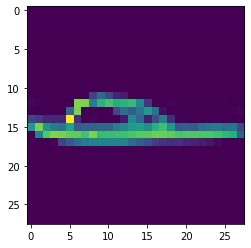

In [4]:
# Visualize the data
import matplotlib.pyplot as plt
plt.imshow(training_data[30])
print(training_labels[30])
print((training_data[30]).shape)

In [5]:
# Note : Neural Network works better with normalized data thats why we need to normalize the data
training_data = training_data / 255.0
testing_data = testing_data / 255.0

In [6]:
# Create the neural network with convolutional layers extra 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3),input_shape=(28,28,1),activation = tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3),activation=tf.nn.relu), # for another set of features from an image to learn
                                    tf.keras.layers.MaxPool2D(2,2),                          
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax) # 10 is for 10 labels
                                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [10]:
# Callbacks to setup the thresholds for training. If that is reached than the training stops
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [11]:
# Compile and train the model
callbacks = myCallback()
model.compile(optimizer='adamax',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(training_data,training_labels,epochs = 20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1811 - accuracy: 0.9338
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1679 - accuracy: 0.9381
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1566 - accuracy: 0.9423
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1462 - accuracy: 0.9475
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1363 - accuracy: 0.9514
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1284 - accuracy: 0.9545
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1189 - accuracy: 0.9578
Epoch 8/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1097 - accuracy: 0.9615
Epoch 9/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1026 - accuracy: 0.9635
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step - l

In [14]:
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


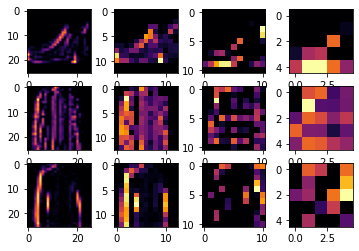

In [21]:
# Visualizing the outputs of the trained filters
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 50
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testing_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testing_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testing_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)